In [1]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, mannwhitneyu
from statsmodels.stats.multitest import multipletests
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
%matplotlib inline

In [3]:
#Load GP2 data
#G2P data
GP2_data_PSC = pd.read_csv('./results/GP2_data_PSC.csv', index_col=0)
GP2_data_BSPSPC = pd.read_csv('./results/GP2_data_BSPSPC.csv', index_col=0)

In [4]:
#Load rarefied genus counts
ab = pd.read_csv('./results/norm_merged_genus_abundances_filtered.csv', index_col=0)

In [5]:
GP2_data_PSC

,GP2_Iso1_IgG,GP2_Iso1_IgA,GP2_Iso4_IgG,GP2_Iso4_IgA,PR3
new_id,,,,,
2020-023_PSC_0001,13.565,8.394,6.012,7.953,2.20
2020-023_PSC_0003,9.223,1.569,1.260,0.900,2.20
2020-023_PSC_0010,2.960,1.600,0.749,0.915,2.20
2020-023_PSC_0022,4.513,8.238,2.030,12.275,20.40
2020-023_PSC_0024,10.978,12.949,5.973,11.817,2.20
...,...,...,...,...,...
2020-023_PSC_0779,5.760,4.430,5.320,2.740,4.68
2020-023_PSC_0780,1.750,0.000,4.690,0.000,2.78
2020-023_PSC_0781,23.030,1.080,9.160,2.240,6.77


In [6]:
GP2_data_BSPSPC

,GP2_Iso1_IgA,GP2_Iso1_IgG,GP2_Iso4_IgA,GP2_Iso4_IgG,PR3
new_id,,,,,
2020-023_BSP_0011,1.05,2.06,4.03,3.61,1.86
2020-023_BSP_0041,1.31,1.74,1.10,1.91,2.28
2020-023_BSP_0055,0.00,1.90,1.77,3.56,1.35
2020-023_BSP_0096,1.67,4.19,1.95,3.91,1.30
2020-023_BSP_0119,0.00,1.35,1.32,2.45,1.55
2020-023_BSP_0132,1.37,2.43,2.34,4.08,2.98
2020-023_BSP_0173,1.37,2.30,2.86,4.03,1.97
2020-023_BSP_0198,3.50,13.92,3.31,6.48,2.95
2020-023_BSP_0217,1.66,1.66,1.77,5.60,2.33


In [7]:
# List of columns to test for normality
columns_to_test = ['GP2_Iso1_IgG', 'GP2_Iso1_IgA', 'GP2_Iso4_IgG', 'GP2_Iso4_IgA', 'PR3']

# Perform Shapiro-Wilk test for each column
normality_results = {}
for column in columns_to_test:
    group1 = GP2_data_PSC[column].dropna()
    group2 = GP2_data_BSPSPC[column].dropna()
    _, p_value_group1 = shapiro(group1)
    _, p_value_group2 = shapiro(group2)
    normality_results[column] = (p_value_group1, p_value_group2)

# Print p-values for each column
print("Shapiro-Wilk test results for normality:")
for column, (p_value_group1, p_value_group2) in normality_results.items():
    print(f"{column}: Group1 p-value = {p_value_group1}, Group2 p-value = {p_value_group2}")


Shapiro-Wilk test results for normality:
GP2_Iso1_IgG: Group1 p-value = 1.4956764764164792e-38, Group2 p-value = 4.03582056662799e-09
GP2_Iso1_IgA: Group1 p-value = 5.997557427310217e-43, Group2 p-value = 7.563782560282561e-07
GP2_Iso4_IgG: Group1 p-value = 1.9737709259554346e-40, Group2 p-value = 0.0005530338967218995
GP2_Iso4_IgA: Group1 p-value = 4.586449873735126e-42, Group2 p-value = 4.460776835912839e-06
PR3: Group1 p-value = 0.0, Group2 p-value = 0.000537003215868026


In [8]:
# List of columns to test
columns_to_test = ['GP2_Iso1_IgG', 'GP2_Iso1_IgA', 'GP2_Iso4_IgG', 'GP2_Iso4_IgA', 'PR3']

# Perform Mann-Whitney U test for each column
mannwhitneyu_results = {}
for column in columns_to_test:
    group1 = GP2_data_PSC[column].dropna()
    group2 = GP2_data_BSPSPC[column].dropna()
    _, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
    mannwhitneyu_results[column] = p_value

# Print p-values for each column
print("Mann-Whitney U test results:")
for column, p_value in mannwhitneyu_results.items():
    print(f"{column}: p-value = {p_value}")

Mann-Whitney U test results:
GP2_Iso1_IgG: p-value = 0.01887387227836035
GP2_Iso1_IgA: p-value = 0.00835858501007224
GP2_Iso4_IgG: p-value = 0.002316901915181613
GP2_Iso4_IgA: p-value = 0.06340766553481159
PR3: p-value = 0.08343529877096417


In [9]:
# Perform Bonferroni correction on p-values
adjusted_p_values = multipletests(list(mannwhitneyu_results.values()), method='bonferroni')[1]

# Create a DataFrame to store the results
results_df = pd.DataFrame({'Column': mannwhitneyu_results.keys(), 'P-Value': list(mannwhitneyu_results.values()), 'Adjusted P-Value': adjusted_p_values})

# Print or display the results
print("Mann-Whitney U test results:")
print(results_df)

# Save the results as a dictionary if needed
results_dict = results_df.set_index('Column').to_dict()['Adjusted P-Value']

Mann-Whitney U test results:
         Column   P-Value  Adjusted P-Value
0  GP2_Iso1_IgG  0.018874          0.094369
1  GP2_Iso1_IgA  0.008359          0.041793
2  GP2_Iso4_IgG  0.002317          0.011585
3  GP2_Iso4_IgA  0.063408          0.317038
4           PR3  0.083435          0.417176


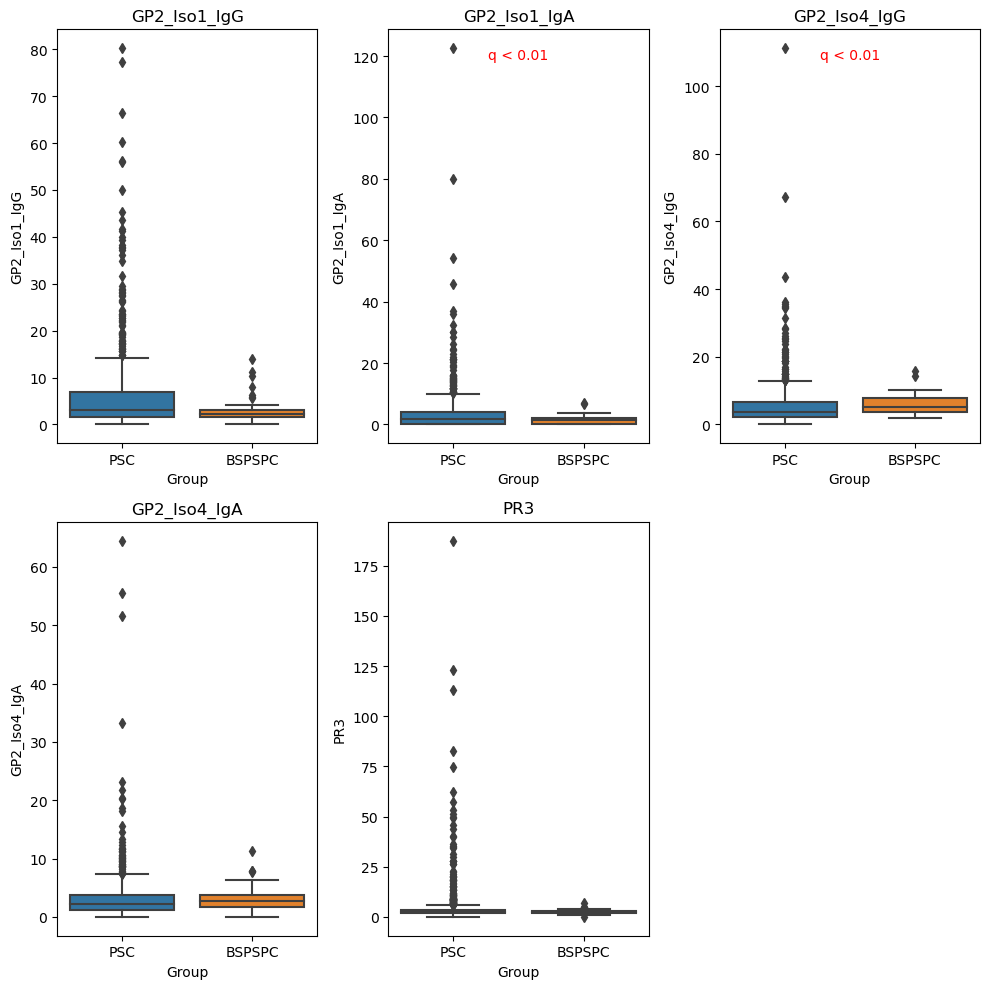

In [10]:
# Concatenate the dataframes and create a 'Group' column to differentiate PSC and BSPSPC
GP2_data_PSC['Group'] = 'PSC'
GP2_data_BSPSPC['Group'] = 'BSPSPC'
combined_data = pd.concat([GP2_data_PSC, GP2_data_BSPSPC])

# Initialize the figure
plt.figure(figsize=(10, 10))

# Iterate over each column and create a boxplot
for i, column in enumerate(columns_to_test, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Group', y=column, data=combined_data)
    plt.title(column)
    
    # Perform Mann-Whitney U test for the current column
    group1 = GP2_data_PSC[column].dropna()
    group2 = GP2_data_BSPSPC[column].dropna()
    _, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
    
    # Add text indicating significance level
    if p_value < 0.01:
        plt.text(0.5, combined_data[column].max(), 'q < 0.01', ha='center', va='top', color='red')

# Adjust layout
plt.tight_layout()

plt.savefig('./results/GP2_wilcoxon.png')
# Show plot
plt.show()

In [11]:
GP2_data_PSC['Group'] = 'PSC'
GP2_data_BSPSPC['Group'] = 'BSPSPC'


In [12]:
GP2_data = pd.concat([GP2_data_PSC, GP2_data_BSPSPC], axis=0)

In [28]:
GP2_data

,GP2_Iso1_IgG,GP2_Iso1_IgA,GP2_Iso4_IgG,GP2_Iso4_IgA,PR3,Group
new_id,,,,,,
2020-023_PSC_0001,13.565,8.394,6.012,7.953,2.20,0
2020-023_PSC_0003,9.223,1.569,1.260,0.900,2.20,0
2020-023_PSC_0010,2.960,1.600,0.749,0.915,2.20,0
2020-023_PSC_0022,4.513,8.238,2.030,12.275,20.40,0
2020-023_PSC_0024,10.978,12.949,5.973,11.817,2.20,0
...,...,...,...,...,...,...
2020-023_SPC_0409,1.350,0.000,7.300,1.660,1.71,1
2020-023_SPC_0480,10.380,1.950,8.160,2.930,2.85,1
2020-023_SPC_0515,11.270,1.460,10.310,0.000,1.35,1


In [14]:
ab

,C__Alphaproteobacteria,C__Deltaproteobacteria,F__Clostridiales_Incertae_Sedis_XII,F__Coriobacteriaceae,F__Cryptomonadaceae,F__Enterobacteriaceae,F__Erysipelotrichaceae,F__Lachnospiraceae,F__Porphyromonadaceae,F__Ruminococcaceae,...,G__Streptococcus,G__Subdoligranulum,G__Sutterella,G__Veillonella,K__Bacteria,O__Bacteroidales,O__Clostridiales,P__Firmicutes,P__Parcubacteria,P__Proteobacteria
2020-023_PSC_0001_srn,134.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,...,0.0,0.0,0.0,0.0,339.0,0.0,0.0,0.0,23.0,74.0
2020-023_PSC_0006_srn,8.0,15.0,0.0,0.0,27.0,0.0,0.0,227.0,0.0,0.0,...,0.0,16.0,0.0,0.0,292.0,0.0,0.0,0.0,78.0,27.0
2020-023_PSC_0007_srn,17.0,0.0,0.0,0.0,8.0,7.0,0.0,21.0,0.0,1.0,...,12.0,11.0,0.0,0.0,129.0,0.0,0.0,0.0,15.0,10.0
2020-023_PSC_0010_srn,0.0,0.0,0.0,0.0,105.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,362.0,0.0,0.0,0.0,22.0,0.0
2020-023_PSC_0015_srn,4.0,0.0,0.0,0.0,0.0,8.0,0.0,50.0,0.0,0.0,...,0.0,0.0,0.0,0.0,126.0,0.0,7.0,0.0,90.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-023_SPC_0189_stl,44.0,0.0,0.0,37.0,0.0,0.0,2.0,333.0,0.0,599.0,...,4.0,115.0,0.0,0.0,4.0,0.0,1690.0,15.0,0.0,33.0
2020-023_SPC_0409_stl,0.0,0.0,0.0,17.0,0.0,0.0,8.0,499.0,0.0,473.0,...,0.0,110.0,0.0,0.0,1.0,0.0,147.0,375.0,0.0,3.0
2020-023_SPC_0515_stl,0.0,0.0,0.0,16.0,0.0,56.0,55.0,747.0,0.0,488.0,...,156.0,202.0,0.0,9.0,68.0,0.0,606.0,22.0,0.0,84.0
2020-023_SPC_0726_stl,0.0,0.0,0.0,2.0,0.0,0.0,15.0,404.0,248.0,605.0,...,38.0,50.0,477.0,60.0,2.0,0.0,40.0,59.0,0.0,0.0


In [15]:
ab['Material'] = np.where(ab.index.str.contains('srn'), 'seren', 'stool')
ab['Group'] = np.where(ab.index.str.contains('PSC'), 'PSC', 'BSPSPC')

# For serum

In [16]:
ab_seren = ab[ab['Material'] == 'seren']
ab_seren = ab_seren.drop(columns = ['Material', 'Group'], axis=1)
ab_seren

,C__Alphaproteobacteria,C__Deltaproteobacteria,F__Clostridiales_Incertae_Sedis_XII,F__Coriobacteriaceae,F__Cryptomonadaceae,F__Enterobacteriaceae,F__Erysipelotrichaceae,F__Lachnospiraceae,F__Porphyromonadaceae,F__Ruminococcaceae,...,G__Streptococcus,G__Subdoligranulum,G__Sutterella,G__Veillonella,K__Bacteria,O__Bacteroidales,O__Clostridiales,P__Firmicutes,P__Parcubacteria,P__Proteobacteria
2020-023_PSC_0001_srn,134.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,...,0.0,0.0,0.0,0.0,339.0,0.0,0.0,0.0,23.0,74.0
2020-023_PSC_0006_srn,8.0,15.0,0.0,0.0,27.0,0.0,0.0,227.0,0.0,0.0,...,0.0,16.0,0.0,0.0,292.0,0.0,0.0,0.0,78.0,27.0
2020-023_PSC_0007_srn,17.0,0.0,0.0,0.0,8.0,7.0,0.0,21.0,0.0,1.0,...,12.0,11.0,0.0,0.0,129.0,0.0,0.0,0.0,15.0,10.0
2020-023_PSC_0010_srn,0.0,0.0,0.0,0.0,105.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,362.0,0.0,0.0,0.0,22.0,0.0
2020-023_PSC_0015_srn,4.0,0.0,0.0,0.0,0.0,8.0,0.0,50.0,0.0,0.0,...,0.0,0.0,0.0,0.0,126.0,0.0,7.0,0.0,90.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-023_SPC_0409_srn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,417.0,290.0,0.0,0.0,444.0,0.0
2020-023_SPC_0480_srn,0.0,0.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,531.0,0.0,0.0,0.0,214.0,236.0
2020-023_SPC_0515_srn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,245.0,162.0,76.0,60.0,164.0,145.0
2020-023_SPC_0726_srn,0.0,158.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,483.0,0.0,0.0,0.0,547.0,0.0


In [17]:
ab_seren.index = ab_seren.index.str.rstrip('_srn')

In [18]:
GP2_data['Group'] = (GP2_data['Group'] == 'BSPSPC').astype(int)


In [29]:
GP2_data_seren = GP2_data.loc[ab_seren.index]

In [20]:
ab_seren

,C__Alphaproteobacteria,C__Deltaproteobacteria,F__Clostridiales_Incertae_Sedis_XII,F__Coriobacteriaceae,F__Cryptomonadaceae,F__Enterobacteriaceae,F__Erysipelotrichaceae,F__Lachnospiraceae,F__Porphyromonadaceae,F__Ruminococcaceae,...,G__Streptococcus,G__Subdoligranulum,G__Sutterella,G__Veillonella,K__Bacteria,O__Bacteroidales,O__Clostridiales,P__Firmicutes,P__Parcubacteria,P__Proteobacteria
2020-023_PSC_0001,134.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,...,0.0,0.0,0.0,0.0,339.0,0.0,0.0,0.0,23.0,74.0
2020-023_PSC_0006,8.0,15.0,0.0,0.0,27.0,0.0,0.0,227.0,0.0,0.0,...,0.0,16.0,0.0,0.0,292.0,0.0,0.0,0.0,78.0,27.0
2020-023_PSC_0007,17.0,0.0,0.0,0.0,8.0,7.0,0.0,21.0,0.0,1.0,...,12.0,11.0,0.0,0.0,129.0,0.0,0.0,0.0,15.0,10.0
2020-023_PSC_0010,0.0,0.0,0.0,0.0,105.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,362.0,0.0,0.0,0.0,22.0,0.0
2020-023_PSC_0015,4.0,0.0,0.0,0.0,0.0,8.0,0.0,50.0,0.0,0.0,...,0.0,0.0,0.0,0.0,126.0,0.0,7.0,0.0,90.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-023_SPC_0409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,417.0,290.0,0.0,0.0,444.0,0.0
2020-023_SPC_0480,0.0,0.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,531.0,0.0,0.0,0.0,214.0,236.0
2020-023_SPC_0515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,245.0,162.0,76.0,60.0,164.0,145.0
2020-023_SPC_0726,0.0,158.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,483.0,0.0,0.0,0.0,547.0,0.0


In [21]:
# log-transformation for ab_seren
ab_seren= ab_seren.apply(lambda x: np.log(x + 1))

In [22]:
# GP2_Iso1_IgG + GP2_Iso1_IgA + GP2_Iso4_IgG + GP2_Iso4_IgA + PR3 are highly correlated leading to multicolinearity

In [23]:
ab_seren.columns

Index(['C__Alphaproteobacteria', 'C__Deltaproteobacteria',
       'F__Clostridiales_Incertae_Sedis_XII', 'F__Coriobacteriaceae',
       'F__Cryptomonadaceae', 'F__Enterobacteriaceae',
       'F__Erysipelotrichaceae', 'F__Lachnospiraceae', 'F__Porphyromonadaceae',
       'F__Ruminococcaceae', 'G__Acidaminococcus', 'G__Akkermansia',
       'G__Alistipes', 'G__Anaerostipes', 'G__Anaerotruncus', 'G__Anaerovorax',
       'G__Bacillus', 'G__Bacteroides', 'G__Barnesiella', 'G__Bifidobacterium',
       'G__Bilophila', 'G__Blautia', 'G__Butyricicoccus', 'G__Butyricimonas',
       'G__Catabacter', 'G__Clostridium_IV', 'G__Clostridium_XVIII',
       'G__Clostridium_XlVa', 'G__Clostridium_XlVb', 'G__Collinsella',
       'G__Coprobacter', 'G__Coprococcus', 'G__Corynebacterium',
       'G__Dialister', 'G__Dorea', 'G__Eggerthella', 'G__Escherichia.Shigella',
       'G__Faecalibacterium', 'G__Flavobacterium', 'G__Flavonifractor',
       'G__Fluviicola', 'G__Fusicatenibacter', 'G__Holdemanella',
      

In [24]:
# Substitute dots with underscores in column names to avoid errors in lm formula
ab_seren.columns = ab_seren.columns.str.replace('.', '_')

/tmp/ipykernel_529/1671243111.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ab_seren.columns = ab_seren.columns.str.replace('.', '_')


In [25]:
ab_seren.columns

Index(['C__Alphaproteobacteria', 'C__Deltaproteobacteria',
       'F__Clostridiales_Incertae_Sedis_XII', 'F__Coriobacteriaceae',
       'F__Cryptomonadaceae', 'F__Enterobacteriaceae',
       'F__Erysipelotrichaceae', 'F__Lachnospiraceae', 'F__Porphyromonadaceae',
       'F__Ruminococcaceae', 'G__Acidaminococcus', 'G__Akkermansia',
       'G__Alistipes', 'G__Anaerostipes', 'G__Anaerotruncus', 'G__Anaerovorax',
       'G__Bacillus', 'G__Bacteroides', 'G__Barnesiella', 'G__Bifidobacterium',
       'G__Bilophila', 'G__Blautia', 'G__Butyricicoccus', 'G__Butyricimonas',
       'G__Catabacter', 'G__Clostridium_IV', 'G__Clostridium_XVIII',
       'G__Clostridium_XlVa', 'G__Clostridium_XlVb', 'G__Collinsella',
       'G__Coprobacter', 'G__Coprococcus', 'G__Corynebacterium',
       'G__Dialister', 'G__Dorea', 'G__Eggerthella', 'G__Escherichia_Shigella',
       'G__Faecalibacterium', 'G__Flavobacterium', 'G__Flavonifractor',
       'G__Fluviicola', 'G__Fusicatenibacter', 'G__Holdemanella',
      

In [30]:
GP2_data_seren = GP2_data_seren.dropna()

In [31]:
GP2_data_seren

,GP2_Iso1_IgG,GP2_Iso1_IgA,GP2_Iso4_IgG,GP2_Iso4_IgA,PR3,Group
2020-023_PSC_0001,13.565,8.394,6.012,7.953,2.20,0
2020-023_PSC_0006,2.640,1.340,3.030,1.410,2.04,0
2020-023_PSC_0007,10.060,3.280,14.370,3.550,2.93,0
2020-023_PSC_0010,2.960,1.600,0.749,0.915,2.20,0
2020-023_PSC_0015,2.560,0.000,3.560,0.000,3.27,0
...,...,...,...,...,...,...
2020-023_SPC_0409,1.350,0.000,7.300,1.660,1.71,1
2020-023_SPC_0480,10.380,1.950,8.160,2.930,2.85,1
2020-023_SPC_0515,11.270,1.460,10.310,0.000,1.35,1
2020-023_SPC_0726,2.600,1.470,4.800,3.970,2.33,1


In [65]:
# Initialize an empty DataFrame to store the results
results_seren = pd.DataFrame(columns=['Genus'])

# Loop through each column in ab_seren
for column in ab_seren.columns:
    # Extract the data for the current column
    data = ab_seren[[column]]
    data = pd.concat([data, GP2_data_seren[['GP2_Iso1_IgA','GP2_Iso4_IgG', 'Group']]], axis=1)
    data = data.dropna()
    
    # Construct the formula 
    formula = f"{column} ~ GP2_Iso1_IgA + GP2_Iso4_IgG"
    
    # Fit the mixed linear model
    model = MixedLM.from_formula(formula, data=data, groups=data['Group'])
    result = model.fit()
    
    # Extract and store the coefficient and p-value
    coef_Iso1_IgA = result.params['GP2_Iso1_IgA']
    p_value_Iso1_IgA = result.pvalues['GP2_Iso1_IgA']
 
    coef_Iso4_IgG = result.params['GP2_Iso4_IgG']
    p_value_Iso4_IgG = result.pvalues['GP2_Iso4_IgG']
    
    
    # Append the results to the DataFrame
    results_seren = results_seren.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_IgA, 'GP2_Iso1_IgA_P-Value': p_value_Iso4_IgG, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Value': p_value_Iso4_IgG}, ignore_index=True)

/tmp/ipykernel_529/3784817740.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren = results_seren.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_IgA, 'GP2_Iso1_IgA_P-Value': p_value_Iso4_IgG, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Value': p_value_Iso4_IgG}, ignore_index=True)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_529/3784817740.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren = results_seren.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_IgA, 'GP2_Iso1_IgA_P-Value': p_value_Iso4_IgG, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Va

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2055: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2055: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2055: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be

/tmp/ipykernel_529/3784817740.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren = results_seren.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_IgA, 'GP2_Iso1_IgA_P-Value': p_value_Iso4_IgG, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Value': p_value_Iso4_IgG}, ignore_index=True)
/tmp/ipykernel_529/3784817740.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren = results_seren.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_IgA, 'GP2_Iso1_IgA_P-Value': p_value_Iso4_IgG, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Value': p_value_Iso4_IgG}, ignore_index=True)
/tmp/ipykernel_529/3784817740.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren = re

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_529/3784817740.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren = results_seren.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_IgA, 'GP2_Iso1_IgA_P-Value': p_value_Iso4_IgG, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Value': p_value_Iso4_IgG}, ignore_index=True)
/tmp/ipykernel_529/3784817740.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren = results_seren.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_IgA, 'GP2_Iso1_IgA_P-Value': p_value_Iso4_IgG, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Va

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarn

In [66]:
results_seren.to_csv('./results/results_seren_mlm.csv', index = True)

In [67]:
results_seren

,Genus,GP2_Iso1_IgA_assoc,GP2_Iso1_IgA_P-Value,GP2_Iso4_IgG_assoc,GP2_Iso4_IgG_P-Value
0,C__Alphaproteobacteria,-0.016718,0.236990,-0.021589,0.236990
1,C__Deltaproteobacteria,-0.015274,0.933396,-0.001484,0.933396
2,F__Clostridiales_Incertae_Sedis_XII,-0.002647,0.948329,0.000414,0.948329
3,F__Coriobacteriaceae,-0.000737,0.595816,-0.001161,0.595816
4,F__Cryptomonadaceae,-0.013314,0.003292,-0.041837,0.003292
...,...,...,...,...,...
70,O__Bacteroidales,0.009084,0.829326,-0.003191,0.829326
71,O__Clostridiales,0.005768,0.383406,-0.015388,0.383406
72,P__Firmicutes,-0.004115,0.577532,-0.008468,0.577532
73,P__Parcubacteria,0.002984,0.101113,-0.022487,0.101113


# For stool

In [43]:
ab_stool = ab[ab['Material'] == 'stool']
ab_stool = ab_stool.drop(columns = ['Material', 'Group'], axis=1)
ab_stool

,C__Alphaproteobacteria,C__Deltaproteobacteria,F__Clostridiales_Incertae_Sedis_XII,F__Coriobacteriaceae,F__Cryptomonadaceae,F__Enterobacteriaceae,F__Erysipelotrichaceae,F__Lachnospiraceae,F__Porphyromonadaceae,F__Ruminococcaceae,...,G__Streptococcus,G__Subdoligranulum,G__Sutterella,G__Veillonella,K__Bacteria,O__Bacteroidales,O__Clostridiales,P__Firmicutes,P__Parcubacteria,P__Proteobacteria
2020-023_PSC_0001_stl,0.0,0.0,5.0,0.0,0.0,0.0,0.0,593.0,0.0,369.0,...,78.0,121.0,0.0,105.0,0.0,0.0,4.0,54.0,0.0,0.0
2020-023_PSC_0002_stl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0,13.0,...,47.0,19.0,26.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-023_PSC_0003_stl,2.0,0.0,5.0,10.0,0.0,315.0,45.0,233.0,0.0,1399.0,...,21.0,1004.0,0.0,0.0,250.0,0.0,1494.0,99.0,0.0,17.0
2020-023_PSC_0005_stl,0.0,0.0,7.0,10.0,0.0,8.0,24.0,240.0,0.0,648.0,...,13.0,34.0,93.0,6.0,0.0,825.0,225.0,6.0,0.0,0.0
2020-023_PSC_0006_stl,10.0,0.0,9.0,193.0,0.0,0.0,21.0,508.0,0.0,1251.0,...,78.0,159.0,84.0,0.0,15.0,16.0,1941.0,1.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-023_SPC_0189_stl,44.0,0.0,0.0,37.0,0.0,0.0,2.0,333.0,0.0,599.0,...,4.0,115.0,0.0,0.0,4.0,0.0,1690.0,15.0,0.0,33.0
2020-023_SPC_0409_stl,0.0,0.0,0.0,17.0,0.0,0.0,8.0,499.0,0.0,473.0,...,0.0,110.0,0.0,0.0,1.0,0.0,147.0,375.0,0.0,3.0
2020-023_SPC_0515_stl,0.0,0.0,0.0,16.0,0.0,56.0,55.0,747.0,0.0,488.0,...,156.0,202.0,0.0,9.0,68.0,0.0,606.0,22.0,0.0,84.0
2020-023_SPC_0726_stl,0.0,0.0,0.0,2.0,0.0,0.0,15.0,404.0,248.0,605.0,...,38.0,50.0,477.0,60.0,2.0,0.0,40.0,59.0,0.0,0.0


In [44]:
ab_stool.index = ab_stool.index.str.rstrip('_stl')

In [45]:
GP2_data_stool = GP2_data.loc[ab_stool.index]

In [46]:
# log-transformation for ab_stool
ab_stool= ab_stool.apply(lambda x: np.log(x + 1))

In [47]:
ab_stool.columns = ab_stool.columns.str.replace('.', '_')

/tmp/ipykernel_529/2548575168.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ab_stool.columns = ab_stool.columns.str.replace('.', '_')


In [48]:
GP2_data_stool = GP2_data_stool.dropna()

In [68]:
# Initialize an empty DataFrame to store the results
results_stool = pd.DataFrame(columns=['Genus'])

# Loop through each column in ab_seren
for column in ab_stool.columns:
    # Extract the data for the current column
    data = ab_stool[[column]]
    data = pd.concat([data, GP2_data_stool[['GP2_Iso1_IgA','GP2_Iso4_IgG', 'Group']]], axis=1)
    data = data.dropna()
    
    # Construct the formula 
    formula = f"{column} ~ GP2_Iso1_IgA + GP2_Iso4_IgG"
    
    # Fit the mixed linear model
    model = MixedLM.from_formula(formula, data=data, groups=data['Group'])
    result = model.fit()
    
    # Extract and store the coefficient and p-value
    coef_Iso1_IgA = result.params['GP2_Iso1_IgA']
    p_value_Iso1_IgA = result.pvalues['GP2_Iso1_IgA']
 
    coef_Iso4_IgG = result.params['GP2_Iso4_IgG']
    p_value_Iso4_IgG = result.pvalues['GP2_Iso4_IgG']
    
    
    # Append the results to the DataFrame
    results_stool = results_stool.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_IgA, 'GP2_Iso1_IgA_P-Value': p_value_Iso4_IgG, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Value': p_value_Iso4_IgG}, ignore_index=True)

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_529/1233486464.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a f

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_529/1233486464.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool = results_stool.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_IgA, 'GP2_Iso1_IgA_P-Value': p_value_Iso4_IgG, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Value': p_value_Iso4_IgG}, ignore_index=True)
/tmp/ipykernel_529/1233486464.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

/tmp/ipykernel_529/1233486464.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool = results_stool.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_IgA, 'GP2_Iso1_IgA_P-Value': p_value_Iso4_IgG, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Value': p_value_Iso4_IgG}, ignore_index=True)
/tmp/ipykernel_529/1233486464.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool = results_stool.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_IgA, 'GP2_Iso1_IgA_P-Value': p_value_Iso4_IgG, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Value': p_value_Iso4_IgG}, ignore_index=True)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter spac

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_529/1233486464.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool = results_stool.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_IgA, 'GP2_Iso1_IgA_P-Value': p_value_Iso4_IgG, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Value': p_value_Iso4_IgG}, ignore_index=True)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2207: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-pack

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_529/1233486464.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool = results_stool.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_IgA, 'GP2_Iso1_IgA_P-Value': p_value_Iso4_IgG, 'GP2_Iso4_Ig

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_529/1233486464.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool = results_stool.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_IgA, 'GP2_Iso1_IgA_P-Value': p_value_Iso4_IgG, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Value': p_value_Iso4_IgG}, ignore_index=True)
/tmp/ipykernel_529/1233486464.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

In [69]:
results_stool.to_csv('./results/results_stool_mlm.csv', index = True)

In [70]:
results_seren

,Genus,GP2_Iso1_IgA_assoc,GP2_Iso1_IgA_P-Value,GP2_Iso4_IgG_assoc,GP2_Iso4_IgG_P-Value
0,C__Alphaproteobacteria,-0.016718,0.236990,-0.021589,0.236990
1,C__Deltaproteobacteria,-0.015274,0.933396,-0.001484,0.933396
2,F__Clostridiales_Incertae_Sedis_XII,-0.002647,0.948329,0.000414,0.948329
3,F__Coriobacteriaceae,-0.000737,0.595816,-0.001161,0.595816
4,F__Cryptomonadaceae,-0.013314,0.003292,-0.041837,0.003292
...,...,...,...,...,...
70,O__Bacteroidales,0.009084,0.829326,-0.003191,0.829326
71,O__Clostridiales,0.005768,0.383406,-0.015388,0.383406
72,P__Firmicutes,-0.004115,0.577532,-0.008468,0.577532
73,P__Parcubacteria,0.002984,0.101113,-0.022487,0.101113


# Barplots for GP2 association and diff abund results

In [71]:
#Load mlr data
results_stool = pd.read_csv('./results/results_stool_mlm.csv', index_col=0)
results_seren = pd.read_csv('./results/results_seren_mlm.csv', index_col=0)

In [72]:
#load results of differential abundance comparison
res_prim_stool = pd.read_csv( "./results/2020-023_res_prim_stool.csv", index_col=0)
res_prim_seren = pd.read_csv( "./results/2020-023_res_prim_seren.csv", index_col=0)

In [73]:
res_prim_stool['taxon']= res_prim_stool['taxon'].str.replace('.', '_')
res_prim_seren['taxon']= res_prim_seren['taxon'].str.replace('.', '_')

/tmp/ipykernel_529/301798902.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  res_prim_stool['taxon']= res_prim_stool['taxon'].str.replace('.', '_')
/tmp/ipykernel_529/301798902.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  res_prim_seren['taxon']= res_prim_seren['taxon'].str.replace('.', '_')


In [74]:
#filter diff abund results
res_prim_seren_filt = res_prim_seren[(res_prim_seren['passed_ss_GroupPSC'] == True) & (res_prim_seren['q_GroupPSC'] < 0.1)]
res_prim_stool_filt = res_prim_stool[(res_prim_stool['passed_ss_GroupPSC'] == True) & (res_prim_stool['q_GroupPSC'] < 0.1)]

In [75]:
# Subset mlr data
subset_res_prim_stool = results_stool[results_stool['Genus'].isin(res_prim_stool_filt['taxon'])]

In [76]:
subset_res_prim_stool.index = subset_res_prim_stool['Genus']

In [77]:
res_prim_stool_filt.index = res_prim_stool_filt['taxon']

In [78]:
# Subset mlr data
subset_res_prim_seren = results_seren[results_seren['Genus'].isin(res_prim_seren_filt['taxon'])]

In [79]:
subset_res_prim_seren.index = subset_res_prim_seren['Genus']

In [80]:
res_prim_seren_filt.index = res_prim_seren_filt['taxon']

In [81]:
merged_stool = pd.concat([subset_res_prim_stool[['GP2_Iso1_IgA_assoc', 'GP2_Iso4_IgG_assoc']],res_prim_stool_filt[['lfc_GroupPSC']]], axis=1)

In [82]:
merged_stool = merged_stool.dropna()

In [100]:
merged_stool

,GP2_Iso1_IgA_assoc,GP2_Iso4_IgG_assoc,lfc_GroupPSC
F__Porphyromonadaceae,-0.015590,0.007194,-1.296659
F__Ruminococcaceae,-0.010983,0.021427,-0.736090
G__Alistipes,-0.027579,0.013431,-0.676990
G__Escherichia_Shigella,0.004204,0.000701,1.061698
G__Flavonifractor,0.004014,0.005805,0.679829
G__Oxalobacter,-0.011415,0.021309,-0.691819
G__Phascolarctobacterium,-0.013686,0.021743,-0.807648
G__Prevotella,-0.018755,0.013194,-1.062308
G__Sutterella,-0.011790,-0.002346,-0.850096
O__Clostridiales,-0.031445,0.038679,-1.269890


In [83]:
merged_seren = pd.concat([subset_res_prim_seren[['GP2_Iso1_IgA_assoc', 'GP2_Iso4_IgG_assoc']],res_prim_seren_filt[['lfc_GroupPSC']]], axis=1)
merged_seren = merged_seren.dropna()
merged_seren

,GP2_Iso1_IgA_assoc,GP2_Iso4_IgG_assoc,lfc_GroupPSC
F__Cryptomonadaceae,-0.013314,-0.041837,1.546408
F__Enterobacteriaceae,-0.009139,0.002525,-0.499901
F__Erysipelotrichaceae,-0.003495,-0.006772,1.014818
F__Ruminococcaceae,0.008590,0.003023,-0.608060
G__Alistipes,0.016689,-0.005429,-0.832957
G__Anaerostipes,-0.027840,0.028126,0.736013
G__Bacillus,-0.092734,0.029536,2.724516
G__Barnesiella,-0.003024,-0.001852,-0.427581
G__Butyricicoccus,-0.005255,-0.002158,-0.639426
G__Clostridium_XlVa,0.025928,-0.005200,-0.882877


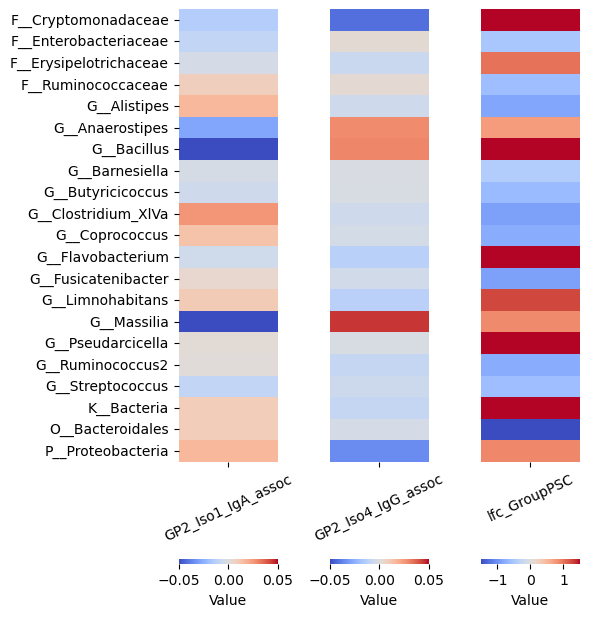

In [103]:
# Loop through each column in the list
columns_to_plot = ['GP2_Iso1_IgA_assoc', 'GP2_Iso4_IgG_assoc', 'lfc_GroupPSC']
# Define vmin and vmax for each color bar
vmin_vmax = [(-0.05, 0.05), (-0.05, 0.05), (-1.5, 1.5)]

plt.figure(figsize=(6, 20))
for i, (column, (vmin, vmax)) in enumerate(zip(columns_to_plot, vmin_vmax)):
    plt.subplot(3, 3, i+1)  # Create subplots for each column
    sns.heatmap(merged_seren[[column]], cmap='coolwarm', annot=False, cbar_kws={'label': 'Value', 'orientation': 'horizontal'}, cbar=True, vmin = vmin, vmax = vmax)
    plt.xticks(rotation=25)
    if i == 0:
        plt.yticks(rotation=0)  # Rotate y-axis ticks for better readability
    else:
        plt.yticks([])  # Remove y-axis ticks for other subplots
plt.savefig('./results/lfc_assoc_seren.png', dpi=300, bbox_inches='tight')
plt.tight_layout()  # Adjust layout
plt.show()

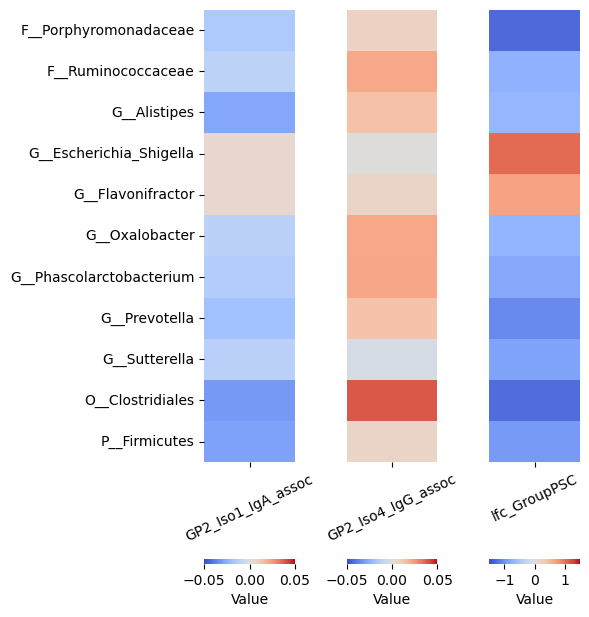

In [104]:
# Loop through each column in the list
columns_to_plot = ['GP2_Iso1_IgA_assoc', 'GP2_Iso4_IgG_assoc', 'lfc_GroupPSC']
# Define vmin and vmax for each color bar
vmin_vmax = [(-0.05, 0.05), (-0.05, 0.05), (-1.5, 1.5)]

plt.figure(figsize=(6, 20))
for i, (column, (vmin, vmax)) in enumerate(zip(columns_to_plot, vmin_vmax)):
    plt.subplot(3, 3, i+1)  # Create subplots for each column
    sns.heatmap(merged_stool[[column]], cmap='coolwarm', annot=False, cbar_kws={'label': 'Value', 'orientation': 'horizontal'}, cbar=True, vmin = vmin, vmax = vmax)
    plt.xticks(rotation=25)
    if i == 0:
        plt.yticks(rotation=0)  # Rotate y-axis ticks for better readability
    else:
        plt.yticks([])  # Remove y-axis ticks for other subplots
plt.savefig('./results/lfc_assoc_stool.png', dpi=300, bbox_inches='tight')
plt.tight_layout()  # Adjust layout
plt.show()